In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from transformers import pipeline
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\uppar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
# Specify the folder path where your datasets are located
folder_path = 'recruitment_data'  # Update this to the folder where the datasets are located

# Initialize an empty list to store cleaned DataFrames
cleaned_dataframes = []

# List all Excel files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

In [30]:
# Loop through each file in the folder
for file in files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing file: {file}")
    
    # Load the dataset
    df = pd.read_excel(file_path)
    
    # Print column names for verification
    print(f"Columns in {file}: {df.columns.tolist()}")
    
    # Drop duplicates
    df.drop_duplicates(inplace=True)
    
    # Define critical columns
    required_columns = ['Transcript', 'Resume', 'Job Description', 'Decision']
    available_columns = [col for col in required_columns if col in df.columns]
    
    if available_columns:
        # Drop rows with missing values in critical columns
        df.dropna(subset=available_columns, inplace=True)
    else:
        print(f"Warning: None of the critical columns {required_columns} are found in {file}.")
    
    # Fill missing values in non-critical columns
    df.fillna('Not Specified', inplace=True)
    
    # Append source file name for tracking
    df['Source_File'] = file
    
    # Append cleaned DataFrame to the list
    cleaned_dataframes.append(df)

# Combine all cleaned DataFrames into one
combined_df = pd.concat(cleaned_dataframes, ignore_index=True)
print(f"Combined dataset shape: {combined_df.shape}")


Processing file: dataset_1_2_3_combined.xlsx
Columns in dataset_1_2_3_combined.xlsx: ['Unnamed: 0', 'ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description', 'num_words_in_transcript']
Combined dataset shape: (1674, 11)


In [32]:
# Function to clean text columns
def clean_text_column(column):
    """
    Cleans a text column by:
    1. Removing all non-alphabetic characters.
    2. Removing extra spaces.
    3. Converting text to lowercase.
    """
    if column.dtype == 'object':  # Only apply to text columns
        return column.str.replace(r"[^a-zA-Z\s]", "", regex=True).str.strip().str.lower()
    return column

# Clean specific text columns
columns_to_clean = ['Transcript', 'Resume', 'Job Description', 'Reason for decision']
for col in columns_to_clean:
    if col in combined_df.columns:
        combined_df[col] = clean_text_column(combined_df[col])

# Display cleaned data for verification
print("Cleaned Data Sample:")
print(combined_df.head())


Cleaned Data Sample:
   Unnamed: 0         ID          Name               Role  \
0           0  brenbr359   brent brown    product manager   
1           1  jameay305   james ayala  software engineer   
2           2  scotri565  scott rivera      data engineer   
3           3  emilke232   emily kelly        ui engineer   
4           4  ashlra638    ashley ray     data scientist   

                                          Transcript  \
0  product manager interview transcript\n\ninterv...   
1  software engineer interview transcript\n\ninte...   
2  here is a simulated interview for scott rivera...   
3  interview transcript emily kelly for ui engine...   
4  data scientist interview transcript\n\ncompany...   

                                              Resume decision  \
0  heres a sample resume for brent brown applying...   select   
1  heres a sample resume for james ayala applying...   select   
2  heres a sample resume for scott rivera applyin...   reject   
3  heres a samp

In [34]:
# Generate summary insights
insights = {}

# Total Candidates
insights['Total Candidates'] = len(combined_df)

# Selected and Rejected Candidates
if 'Decision' in combined_df.columns:
    decision_counts = combined_df['Decision'].str.strip().value_counts()
    insights['Selected Candidates'] = decision_counts.get('select', 0)
    insights['Rejected Candidates'] = decision_counts.get('reject', 0)
else:
    insights['Selected Candidates'] = "Column 'Decision' not found"
    insights['Rejected Candidates'] = "Column 'Decision' not found"

# Most Common Reason for Decision
if 'Reason for decision' in combined_df.columns:
    insights['Most Common Reason for Decision'] = combined_df['Reason for decision'].mode()[0]
else:
    insights['Most Common Reason for Decision'] = "Column 'Reason for decision' not found"

# Print insights
print("Insights:")
for key, value in insights.items():
    print(f"{key}: {value}")


Insights:
Total Candidates: 1674
Selected Candidates: Column 'Decision' not found
Rejected Candidates: Column 'Decision' not found
Most Common Reason for Decision: technical knowledge


In [36]:
# Check for null values
print("Null values in combined dataset:")
print(combined_df.isnull().sum())


Null values in combined dataset:
Unnamed: 0                 0
ID                         0
Name                       0
Role                       0
Transcript                 0
Resume                     0
decision                   0
Reason for decision        0
Job Description            0
num_words_in_transcript    0
Source_File                0
dtype: int64


In [38]:
# Basic statistics for numeric columns
print("Basic statistics for numeric columns:")
print(combined_df.describe())


Basic statistics for numeric columns:
        Unnamed: 0  num_words_in_transcript
count  1674.000000              1674.000000
mean    874.354839               704.784349
std     503.885207               123.191149
min       0.000000                64.000000
25%     438.250000               617.000000
50%     876.500000               709.000000
75%    1307.750000               791.000000
max    1749.000000              1158.000000


In [40]:
print(combined_df.columns.tolist())


['Unnamed: 0', 'ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description', 'num_words_in_transcript', 'Source_File']


C:\Users\uppar\AppData\Local\Temp\ipykernel_13012\1896382596.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reason_counts.index, y=reason_counts.values, palette='coolwarm')


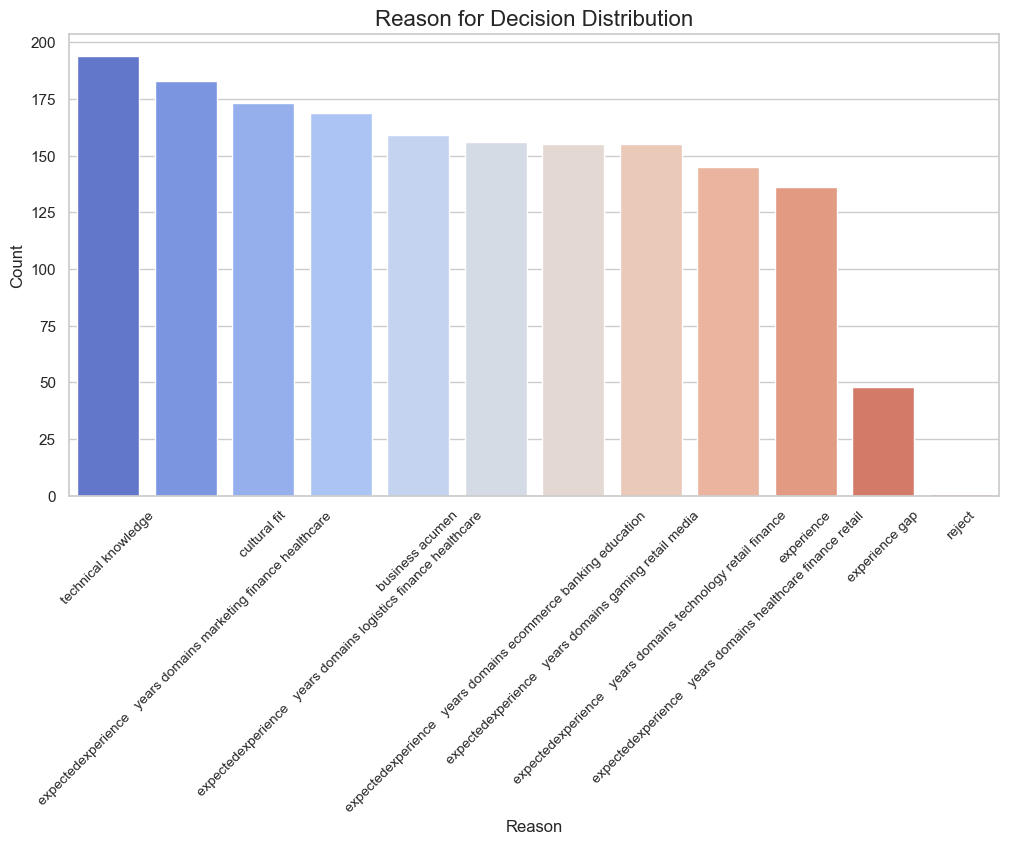

In [42]:
# Configure visualizations
sns.set(style="whitegrid")

# Plot the distribution of 'Decision'
if 'Decision' in combined_df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=combined_df, x='Decision', palette='viridis')
    plt.title('Decision Distribution', fontsize=16)
    plt.xlabel('Decision', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()

# Plot a bar chart for 'Reason for Decision'
if 'Reason for decision' in combined_df.columns:
    plt.figure(figsize=(12, 6))
    reason_counts = combined_df['Reason for decision'].value_counts()
    sns.barplot(x=reason_counts.index, y=reason_counts.values, palette='coolwarm')
    plt.title('Reason for Decision Distribution', fontsize=16)
    plt.xlabel('Reason', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.show()


In [44]:
print("Null values in combined dataset:")
print(combined_df.isnull().sum())


Null values in combined dataset:
Unnamed: 0                 0
ID                         0
Name                       0
Role                       0
Transcript                 0
Resume                     0
decision                   0
Reason for decision        0
Job Description            0
num_words_in_transcript    0
Source_File                0
dtype: int64


In [46]:
print("Basic statistics for numeric columns:")
print(combined_df.describe())


Basic statistics for numeric columns:
        Unnamed: 0  num_words_in_transcript
count  1674.000000              1674.000000
mean    874.354839               704.784349
std     503.885207               123.191149
min       0.000000                64.000000
25%     438.250000               617.000000
50%     876.500000               709.000000
75%    1307.750000               791.000000
max    1749.000000              1158.000000


In [48]:
print("Sample rows from the cleaned dataset:")
print(combined_df.head())


Sample rows from the cleaned dataset:
   Unnamed: 0         ID          Name               Role  \
0           0  brenbr359   brent brown    product manager   
1           1  jameay305   james ayala  software engineer   
2           2  scotri565  scott rivera      data engineer   
3           3  emilke232   emily kelly        ui engineer   
4           4  ashlra638    ashley ray     data scientist   

                                          Transcript  \
0  product manager interview transcript\n\ninterv...   
1  software engineer interview transcript\n\ninte...   
2  here is a simulated interview for scott rivera...   
3  interview transcript emily kelly for ui engine...   
4  data scientist interview transcript\n\ncompany...   

                                              Resume decision  \
0  heres a sample resume for brent brown applying...   select   
1  heres a sample resume for james ayala applying...   select   
2  heres a sample resume for scott rivera applyin...   reject  

In [50]:
import string

# Function to clean text columns
def clean_text_column(column):
    """
    Cleans a text column by:
    1. Removing punctuation marks.
    2. Removing extra spaces.
    3. Converting text to lowercase.
    """
    if column.dtype == 'object':  # Only apply to text columns
        return column.str.replace(f"[{string.punctuation}]", "", regex=True).str.strip().str.lower()
    return column

# Apply cleaning to specific columns
columns_to_clean = ['Transcript', 'Resume', 'Job Description', 'Reason for decision']  # Add more columns if necessary
for col in columns_to_clean:
    if col in combined_df.columns:
        combined_df[col] = clean_text_column(combined_df[col])

# Display cleaned data for verification
print("Cleaned Data Sample:")
print(combined_df.head())


Cleaned Data Sample:
   Unnamed: 0         ID          Name               Role  \
0           0  brenbr359   brent brown    product manager   
1           1  jameay305   james ayala  software engineer   
2           2  scotri565  scott rivera      data engineer   
3           3  emilke232   emily kelly        ui engineer   
4           4  ashlra638    ashley ray     data scientist   

                                          Transcript  \
0  product manager interview transcript\n\ninterv...   
1  software engineer interview transcript\n\ninte...   
2  here is a simulated interview for scott rivera...   
3  interview transcript emily kelly for ui engine...   
4  data scientist interview transcript\n\ncompany...   

                                              Resume decision  \
0  heres a sample resume for brent brown applying...   select   
1  heres a sample resume for james ayala applying...   select   
2  heres a sample resume for scott rivera applyin...   reject   
3  heres a samp

In [54]:
def clean_text_column(column):
    """
    Cleans a text column by:
    1. Removing all non-alphabetic characters.
    2. Removing extra spaces.
    3. Converting text to lowercase.
    """
    if column.dtype == 'object':  # Only apply to text columns
        return column.str.replace(r"[^a-zA-Z\s]", "", regex=True).str.strip().str.lower()
    return column


In [56]:
# Apply cleaning to all object-type columns in the dataset
combined_df = combined_df.apply(lambda col: clean_text_column(col) if col.dtype == 'object' else col)


In [58]:
# Check for remaining unwanted characters
for col in columns_to_clean:
    if col in combined_df.columns:
        print(f"Sample cleaned data from column '{col}':")
        print(combined_df[col].head())


Sample cleaned data from column 'Transcript':
0    product manager interview transcript\n\ninterv...
1    software engineer interview transcript\n\ninte...
2    here is a simulated interview for scott rivera...
3    interview transcript emily kelly for ui engine...
4    data scientist interview transcript\n\ncompany...
Name: Transcript, dtype: object
Sample cleaned data from column 'Resume':
0    heres a sample resume for brent brown applying...
1    heres a sample resume for james ayala applying...
2    heres a sample resume for scott rivera applyin...
3    heres a sample resume for emily kelly\n\nemily...
4    heres a sample resume for ashley ray applying ...
Name: Resume, dtype: object
Sample cleaned data from column 'Job Description':
0    we are looking for a skilled product manager w...
1    we are looking for a skilled software engineer...
2    we are looking for a skilled data engineer wit...
3    we are looking for a skilled ui engineer with ...
4    we are looking for a skill

<Figure size 1000x600 with 0 Axes>

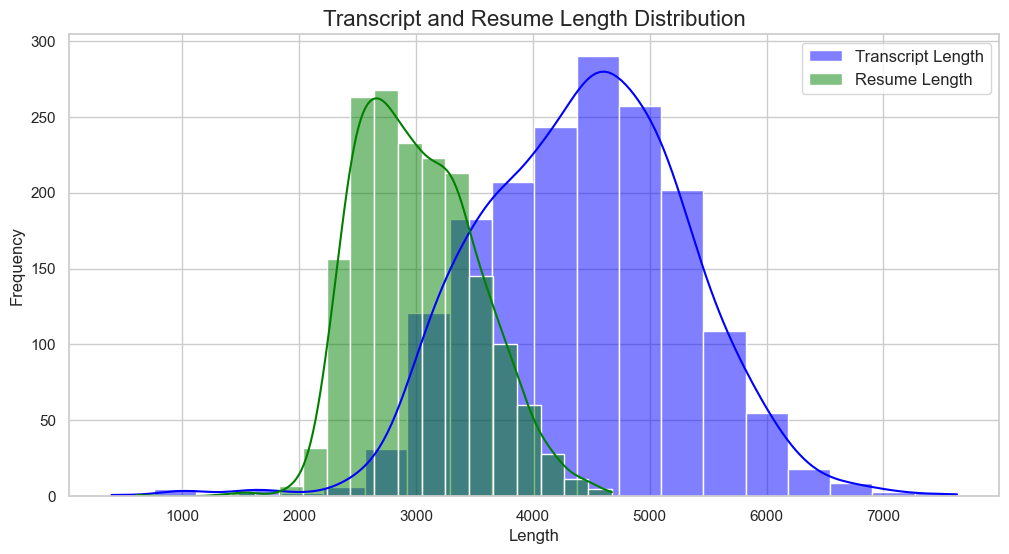

C:\Users\uppar\AppData\Local\Temp\ipykernel_28684\3559725419.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reason_counts.index, y=reason_counts.values, palette='coolwarm')


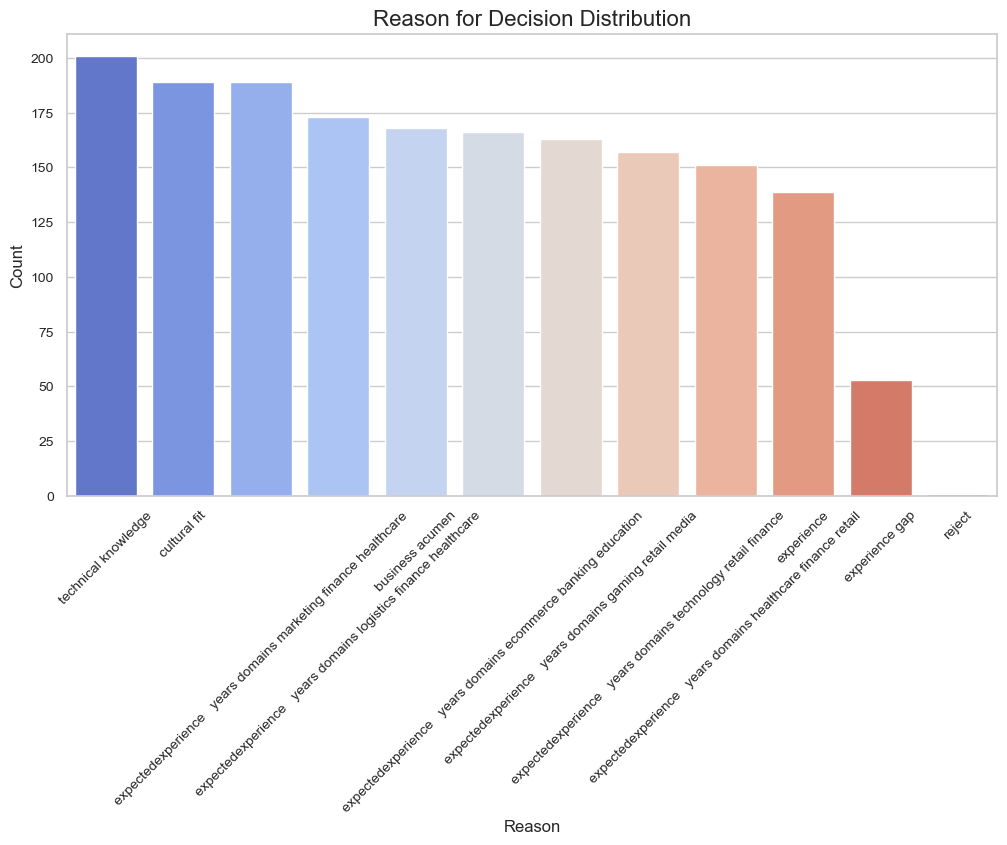

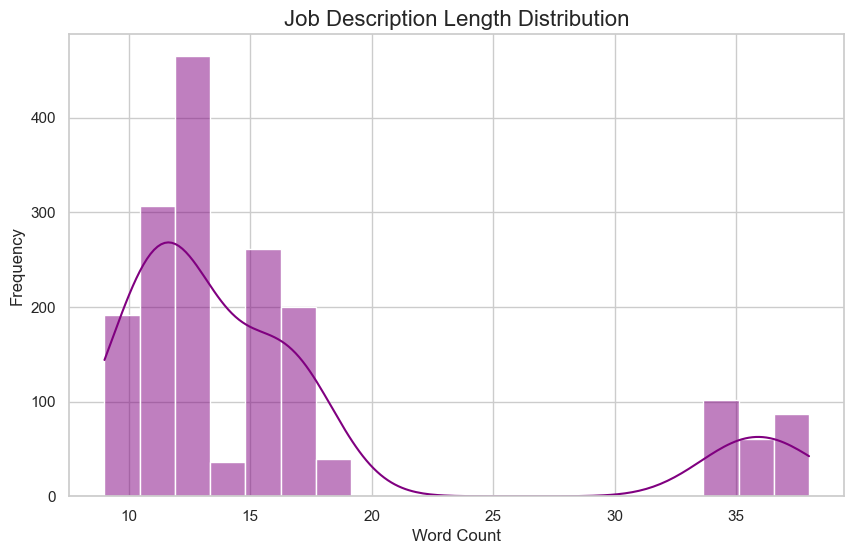

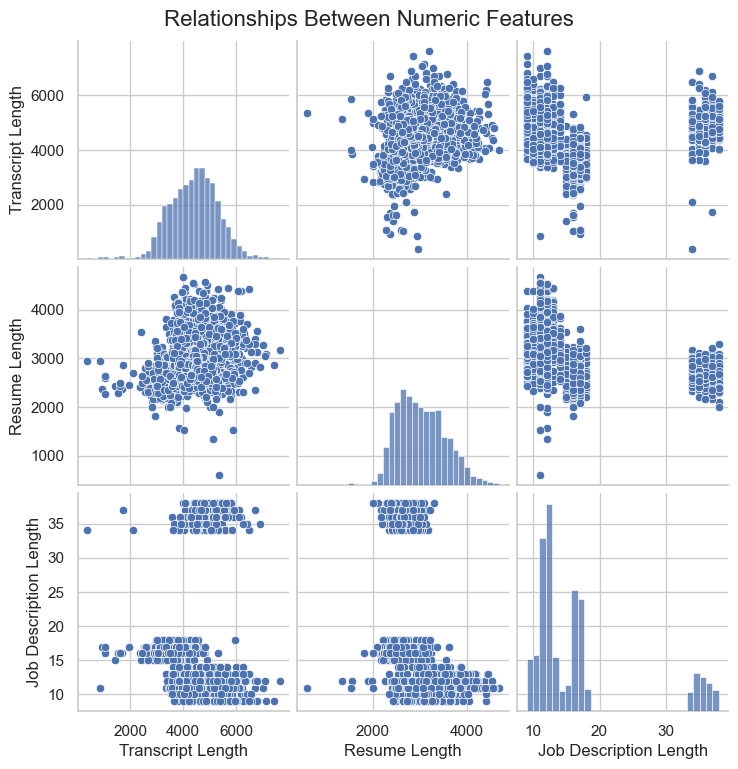

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the distribution of 'Decision'
if 'Decision' in combined_df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=combined_df, x='Decision', palette='viridis')
    plt.title('Decision Distribution', fontsize=16)
    plt.xlabel('Decision', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Plot a word count distribution for 'Transcript' and 'Resume'
if 'Transcript Length' in combined_df.columns and 'Resume Length' in combined_df.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(combined_df['Transcript Length'], kde=True, color='blue', label='Transcript Length', bins=20)
    sns.histplot(combined_df['Resume Length'], kde=True, color='green', label='Resume Length', bins=20)
    plt.title('Transcript and Resume Length Distribution', fontsize=16)
    plt.xlabel('Length', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(fontsize=12)
    plt.show()

# Plot a bar chart for 'Reason for Decision'
if 'Reason for decision' in combined_df.columns:
    plt.figure(figsize=(12, 6))
    reason_counts = combined_df['Reason for decision'].value_counts()
    sns.barplot(x=reason_counts.index, y=reason_counts.values, palette='coolwarm')
    plt.title('Reason for Decision Distribution', fontsize=16)
    plt.xlabel('Reason', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Plot the distribution of 'Job Description' word counts
if 'Job Description' in combined_df.columns:
    combined_df['Job Description Length'] = combined_df['Job Description'].str.split().str.len()
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_df['Job Description Length'], kde=True, color='purple', bins=20)
    plt.title('Job Description Length Distribution', fontsize=16)
    plt.xlabel('Word Count', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()
